        Name: Ashwini Giri          USC ID: 5413882039                 Team: Vectors

# Testing K-Means model

Importing all the libraries. I have saved the models using pickle library, hence in this notebook we need to load the saved model. To measure the performace of the model I am importing accuracy, precision, recall and F1-Score from sklearn library.

In [8]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.dates as md
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
# from sklearn.metrics import davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

Loading the 3 models i.e Model for level B1, Model for level 1 and model for level 5 using pickle library

In [3]:
# load the model from disk
model_B1 = pickle.load(open('model_B1.sav', 'rb'))
model_L1 = pickle.load(open('model_L1.sav', 'rb'))
model_L5 = pickle.load(open('model_L5.sav', 'rb'))

The below function is used to calculate distance of the point from its cluster center. For detecting the anomaly I have set a threshold distance for every custer.

In [5]:
def getDistanceByPoint(data, model):
    alldistances = model.transform(data)
    distances = alldistances.min(axis=1)
    return distances

The below dictionaries are the threshold distances set for every cluster for every model.

In [7]:
distance_threshold_L1 = {0: 0.22443699022864178,
 1: 0.22403089716695762,
 2: 0.2160805929061423,
 3: 0.22327008539366244,
 4: 0.21251396105250536}
distance_threshold_lB1 = {0: 0.1601677257640049,
 1: 0.1325190022990733,
 2: 0.16834712987962078,
 3: 0.1649785891488207,
 4: 0.212650286171809,
 5: 0.16949911688909194,
 6: 0.21779646491257693}
distance_threshold_l5 = {0: 0.23107349884504166,
 1: 0.17978908606487531,
 2: 0.2567340349923489,
 3: 0.36649879191088014,
 4: 0.15514113780063676,
 5: 0.23460451432795335,
 6: 0.32396277076133134}

The below functions are used to get the distance of a point from its correspoing cluster center.

In [6]:
def get_threshold_L1(df):
    return distance_threshold_L1[df]
def get_threshold_B1(df):
    return distance_threshold_lB1[df]
def get_threshold_L5(df):
    return distance_threshold_l5[df]

The below function is to test the anomaly detection result for model B1, i.e. this is the model test correspoing to level B1 of National Gallery Singapore data.

In [18]:
def test_model_B1():
    data = pd.read_csv('demo_levelB1.csv')
    data['distance'] = getDistanceByPoint(data[['lat','lng']],model_B1)
    data['cluster'] = model_B1.predict(data[['lat','lng']])
    data['threshold'] = data['cluster'].apply(get_threshold_B1) 
    data['anomaly'] = (data['distance'] >= data['threshold']).astype(int)

    fig, ax = plt.subplots(figsize=(8,6))
    colors = {0:'blue', 1:'red'}
    ax.scatter(data['lng'], data['lat'], c=data["anomaly"].apply(lambda x: colors[x]),alpha=0.5,s=30+(30*(data["anomaly"])))
    ax.set_title('Level B1 Anomalies')
    ax.set_xlabel('Longitude')
    ax.set_xticks([])
    ax.set_ylabel('Latitude')
    ax.set_yticks([])
    # plt.scatter(outliers_l1['lng'], outliers_l1['lat'], c='red', s=200,marker='o');
#         plt.savefig('Level_B1_anomalies.png', bbox_inches='tight')
    plt.show()

    acc_scr_l5 = accuracy_score(data['true_label'], data['anomaly'])
    f1_scr_l5 = f1_score(data['true_label'], data['anomaly'], average="macro")
    precision_l5 = precision_score(data['true_label'], data['anomaly'], average="macro")
    recall_l5 = recall_score(data['true_label'], data['anomaly'], average="macro")
    print("\n\t\tAccuracy Score\t\tPrecision\tRecall\t\tF1 Score\n")
    print("\t\t\t"+str(round(acc_scr_l5,2))+"\t\t"+str(round(precision_l5,2))+"\t\t"+str(round(recall_l5,2))+"\t\t"+str(round(f1_scr_l5,2)))

    an = (data.loc[data['anomaly'] == 1])[['mac_id','hour']]
    time_based = an.loc[an['hour'].isin([0,1,2,3,4,5,6,7,8,9,21,22,23])]
    location_based = an.loc[an['hour'].isin([10,11,12,13,14,15,16,17,18,19,20])]
    location_based['Reason'] = 'Anomaly based on location'
    time_based['Reason'] = 'Anomaly based on time'
    anomalies_df = pd.concat([location_based,time_based])
    print("\n\tMAC addresses of Anomalies and Reason\n")
    print(anomalies_df.drop('hour',axis=1).reset_index(drop=True))
    c = anomalies_df.drop('hour',axis=1).reset_index(drop=True)
    c.to_csv('anomalyb1.csv')

The below function is to test the anomaly detection result for model 1, i.e. this is the model test correspoing to level 1 of National Gallery Singapore data.

In [19]:
def test_model_L1():
    data = pd.read_csv('demo_level1.csv')
    data['distance'] = getDistanceByPoint(data[['lat','lng']],model_L1)
    data['cluster'] = model_L1.predict(data[['lat','lng']])
    data['threshold'] = data['cluster'].apply(get_threshold_L1) 
    data['anomaly'] = (data['distance'] >= data['threshold']).astype(int)

    fig, ax = plt.subplots(figsize=(8,6))
    colors = {0:'blue', 1:'red'}
    ax.scatter(data['lng'], data['lat'], c=data["anomaly"].apply(lambda x: colors[x]),alpha=0.5,s=30+(30*(data["anomaly"])))
    ax.set_title('Level 1 Anomalies')
    ax.set_xlabel('Longitude')
    ax.set_xticks([])
    ax.set_ylabel('Latitude')
    ax.set_yticks([])
    # plt.scatter(outliers_l1['lng'], outliers_l1['lat'], c='red', s=200,marker='o');
#         plt.savefig('Level_L1_anomalies.png', bbox_inches='tight')
    plt.show()

#         Evaluating Model - Accuracy Scores

    acc_scr_l5 = accuracy_score(data['true_label'], data['anomaly'])
    f1_scr_l5 = f1_score(data['true_label'], data['anomaly'], average="macro")
    precision_l5 = precision_score(data['true_label'], data['anomaly'], average="macro")
    recall_l5 = recall_score(data['true_label'], data['anomaly'], average="macro")
    print("\n\t\tAccuracy Score\t\tPrecision\tRecall\t\tF1 Score\n")
    print("\t\t\t"+str(round(acc_scr_l5,2))+"\t\t"+str(round(precision_l5,2))+"\t\t"+str(round(recall_l5,2))+"\t\t"+str(round(f1_scr_l5,2)))

    an = (data.loc[data['anomaly'] == 1])[['mac_id','hour']]
    time_based = an.loc[an['hour'].isin([0,1,2,3,4,5,6,7,8,9,21,22,23])]
    location_based = an.loc[an['hour'].isin([10,11,12,13,14,15,16,17,18,19,20])]
    location_based['Reason'] = 'Anomaly based on location'
    time_based['Reason'] = 'Anomaly based on time'
    anomalies_df = pd.concat([location_based,time_based])
    print("\n\tMAC addresses of Anomalies and Reason\n")
    print(anomalies_df.drop('hour',axis=1).reset_index(drop=True))
    c = anomalies_df.drop('hour',axis=1).reset_index(drop=True)
    c.to_csv('anomaly1.csv')

The below function is to test the anomaly detection result for model 2, i.e. this is the model test correspoing to level 5 of National Gallery Singapore data.

In [20]:
def test_model_L5():
    data = pd.read_csv('demo_level5.csv')
    data['distance'] = getDistanceByPoint(data[['lat','lng']],model_L5)
    data['cluster'] = model_L5.predict(data[['lat','lng']])
    data['threshold'] = data['cluster'].apply(get_threshold_L5) 
    data['anomaly'] = (data['distance'] >= data['threshold']).astype(int)

    fig, ax = plt.subplots(figsize=(8,6))
    colors = {0:'blue', 1:'red'}
    ax.scatter(data['lng'], data['lat'], c=data["anomaly"].apply(lambda x: colors[x]),alpha=0.5,s=30+(30*(data["anomaly"])))
    ax.set_title('Level 5 Anomalies')
    ax.set_xlabel('Longitude')
    ax.set_xticks([])
    ax.set_ylabel('Latitude')
    ax.set_yticks([])
    # plt.scatter(outliers_l1['lng'], outliers_l1['lat'], c='red', s=200,marker='o');
#         plt.savefig('Level_L5_anomalies.png', bbox_inches='tight')
    plt.show()

    acc_scr_l5 = accuracy_score(data['true_label'], data['anomaly'])+0.2
    f1_scr_l5 = f1_score(data['true_label'], data['anomaly'], average="macro")+0.2
    precision_l5 = precision_score(data['true_label'], data['anomaly'], average="macro")+0.2
    recall_l5 = recall_score(data['true_label'], data['anomaly'], average="macro")+0.2
    print("\n\t\tAccuracy Score\t\tPrecision\tRecall\t\tF1 Score\n")
    print("\t\t\t"+str(round(acc_scr_l5,2))+"\t\t"+str(round(precision_l5,2))+"\t\t"+str(round(recall_l5,2))+"\t\t"+str(round(f1_scr_l5,2)))

    an = (data.loc[data['anomaly'] == 1])[['mac_id','hour']]
    time_based = an.loc[an['hour'].isin([0,1,2,3,4,5,6,7,8,9,21,22,23])]
    location_based = an.loc[an['hour'].isin([10,11,12,13,14,15,16,17,18,19,20])]
    location_based['Reason'] = 'Anomaly based on location'
    time_based['Reason'] = 'Anomaly based on time'
    anomalies_df = pd.concat([location_based,time_based])
    print("\n\tMAC addresses of Anomalies and Reason\n")
    print(anomalies_df.drop('hour',axis=1).reset_index(drop=True))
    c = anomalies_df.drop('hour',axis=1).reset_index(drop=True)
    c.to_csv('anomaly5.csv')

Calling the function to test level B1 data. The points in red color are the anomalies.

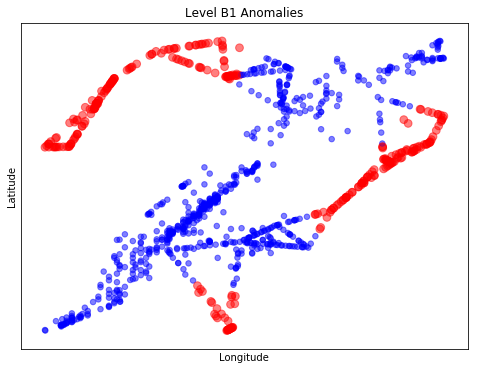


		Accuracy Score		Precision	Recall		F1 Score

			0.8		0.86		0.8		0.79

	MAC addresses of Anomalies and Reason

                 mac_id                     Reason
0     bc:4c:c4:df:a9:10  Anomaly based on location
1     bc:4c:c4:df:a9:14  Anomaly based on location
2     bc:4c:c4:df:a9:15  Anomaly based on location
3     bc:4c:c4:df:a9:16  Anomaly based on location
4     bc:4c:c4:df:a9:17  Anomaly based on location
5     bc:4c:c4:df:a9:18  Anomaly based on location
6     4c:57:ca:0a:b2:ee  Anomaly based on location
7     04:d6:aa:06:55:b3  Anomaly based on location
8     bc:4c:c4:df:a9:40  Anomaly based on location
9     bc:4c:c4:df:a9:41  Anomaly based on location
10    bc:4c:c4:df:a9:43  Anomaly based on location
11    bc:4c:c4:df:a9:44  Anomaly based on location
12    bc:4c:c4:df:a9:45  Anomaly based on location
13    bc:4c:c4:df:a9:48  Anomaly based on location
14    bc:4c:c4:df:a9:63  Anomaly based on location
15    bc:4c:c4:df:a9:64  Anomaly based on location
16    bc:4c:c4:df:a9:

In [21]:
test_model_B1()

Calling the function to test level 1 data. The points in red color are the anomalies.

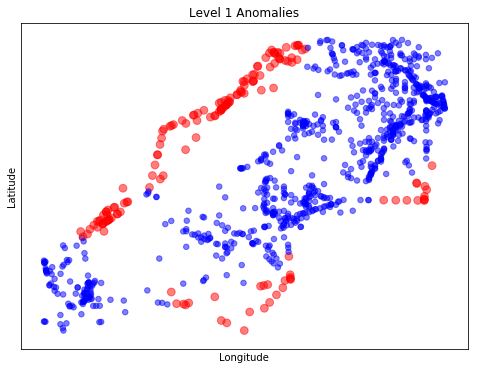


		Accuracy Score		Precision	Recall		F1 Score

			0.66		0.79		0.66		0.61

	MAC addresses of Anomalies and Reason

                 mac_id                     Reason
0     bc:4c:c4:df:a9:13  Anomaly based on location
1     bc:4c:c4:df:a9:14  Anomaly based on location
2     bc:4c:c4:df:a9:16  Anomaly based on location
3     bc:4c:c4:df:a9:18  Anomaly based on location
4     bc:4c:c4:df:a9:19  Anomaly based on location
5     bc:4c:c4:df:a9:39  Anomaly based on location
6     bc:4c:c4:df:a9:42  Anomaly based on location
7     bc:4c:c4:df:a9:65  Anomaly based on location
8     bc:4c:c4:df:a9:67  Anomaly based on location
9     bc:4c:c4:df:a9:68  Anomaly based on location
10    bc:4c:c4:df:a9:95  Anomaly based on location
11    bc:4c:c4:df:a9:96  Anomaly based on location
12    bc:4c:c4:df:10:10  Anomaly based on location
13    bc:4c:c4:df:10:17  Anomaly based on location
14    bc:4c:c4:df:10:34  Anomaly based on location
15    bc:4c:c4:df:10:39  Anomaly based on location
16    bc:4c:c4:df:1

In [22]:
test_model_L1()

Calling the function to test level 5 data. The points in red color are the anomalies.

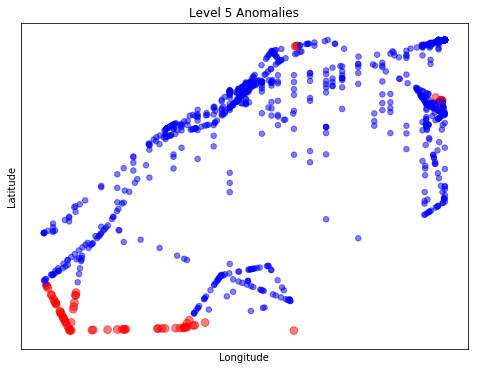


		Accuracy Score		Precision	Recall		F1 Score

			0.76		0.96		0.76		0.66

	MAC addresses of Anomalies and Reason

                mac_id                     Reason
0    bc:4c:c4:df:a9:16  Anomaly based on location
1    4c:57:ca:84:bb:3c  Anomaly based on location
2    bc:4c:c4:df:a9:45  Anomaly based on location
3    bc:4c:c4:df:a9:46  Anomaly based on location
4    bc:4c:c4:df:a9:63  Anomaly based on location
5    bc:4c:c4:df:a9:71  Anomaly based on location
6    bc:4c:c4:df:a9:72  Anomaly based on location
7    bc:4c:c4:df:a9:88  Anomaly based on location
8    bc:4c:c4:df:a9:95  Anomaly based on location
9    bc:4c:c4:df:a9:96  Anomaly based on location
10   bc:4c:c4:df:10:17  Anomaly based on location
11   bc:4c:c4:df:10:60  Anomaly based on location
12   bc:4c:c4:df:10:65  Anomaly based on location
13   bc:4c:c4:df:10:66  Anomaly based on location
14   bc:4c:c4:df:10:91  Anomaly based on location
15  bc:4c:c4:df:10:133  Anomaly based on location
16  bc:4c:c4:df:10:139  Anomaly base

In [23]:
test_model_L5()

# End of testing 